In [1]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), ".."))  # If we run the jupyter notebook from the current directory

# Dynamic (laser) speckle simulations
## Basic introduction
This notebook is aimed at introducing and presenting our current dynamic (i.e. moving) speckle simulation algorithms. If the reader has not visited the notebook about static speckle simulations, we encourage them to do so before continuing the current notebook.

The way speckles are generated is *similar* to the way static ones are done: we generate uniformly random phases in the interval $[-\pi, \pi]$, then a Fourier transform is done to simulate propagation to a lens (for now, only a circular lens can be used, but we want to implement ellipsoid ones), then the invert Fourier transform is done to propagate from the lens to the image plane. Thus, we once again have imaging speckles, but in the future we aim at more types of speckles, so we want to implement non-imaging speckles too. The speckle shapes are also still governed by the same parameters, but now we care also about the temporal statistics of speckles. Thus, let's talk about speckle correlation for some time

## Speckle correlation
Speckle correlation is a spatio-temporal property of the speckle pattern. When we talk about *correlation*, it can be seen as "how much information does a speckle/speckle pattern (but it is really just pixels) gives about another speckle/speckle pattern (other pixels)" and is useful for the study of the properties of the sample that is illuminated. In our case, no samples are illuminated, but they can be simulated, to an extent. We will see in this notebook that we can easily simulate speckles following a certain temporal correlation (or decorrelation). It is also possible to generate speckle having a spatial correlation. Temporal and spatial correlations are not that different from one another. Spatial correlation can be seen as "how are two speckles (really just pixels) correlated" or in other terms "how are two speckles (really just pixels) similar/give information about one another". It is not different from statistical correlation of two random variables, since speckles are random variables following specific statistical rules.

## Introduction to the code
Similar to static simulations, dynamic simulations are separeted in different classes doing different simulations. Right now, there are three ways to generate dynamic speckle patterns:
1. Uniform speckle decorrelation
2. Brownian motion decorrelation
3. Pupil motion decorrelation

The first two are really similar. The algorithms won't be described here, since the goal is to show how they are used and not about what's under the hood. But uniform decorrelation is simply a linear decorrelation between the participating fields, resulting in a quadratic decorrelation in time. Meanwhile, Brownian motion decorrelation is based on a popular model of Brownian motion:

$$K_B = \exp{-\frac{\tau}{\tau_c}}$$

where $K_B$ is the correlation coefficient, $\tau$ is the time and $\tau_c$ is the characteristic decorrelation time. $\tau_c$ is an interesting property of the sample illuminated, because it relates to the velocity of the scatterers and the Brownian motion of the particles contained in the sample. Hence, a rigid body will have a big characteristic time, while something like a liquid solution will have a smaller characteristic time.

Finally, the pupil motion decorrelation is the simplest one of the three. We only need to move the lens and the speckle pattern will change through time until it is completely decorrelated. Let's first create a simulation with the pupil motion.

In [2]:
from Speckles.SpeckleSimulations import dynamicSpeckleSimulations
from Speckles.SpeckleSimulations.simulationUtils import SpeckleSimulationsUtils

In [3]:
sim_shape = 1000
circle_diameter = SpeckleSimulationsUtils.circle_diameter_for_specific_speckle_size(sim_shape, 15)
sim = dynamicSpeckleSimulations.DynamicSpeckleSimulationsFromCircularSourceWithPupilMotion(sim_shape, 5,
                                                                                           circle_diameter, (0, 0),
                                                                                           (circle_diameter, 0))
sim.simulate()

Since the speckles are now dynamic, we don't have a single image to display, but a sequence of temporally changing speckle patterns. Hence, we developed two interesting methods. The first one to be shown is `show_previous_simulations`, which takes a single argument `indices`. This argument is used to specify which simulation frames to display. By default, it is `"all"`, which means we want to display every frame. In our case, we only have $5$ speckle patterns, so we can show them all without taking too much space.

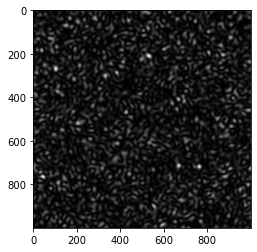

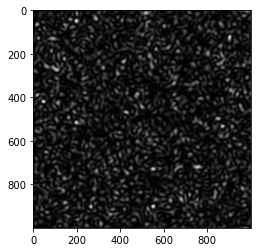

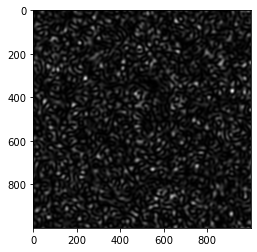

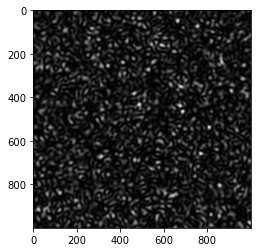

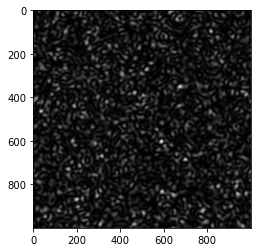

In [4]:
sim.show_previous_simulations()

As we can  see, the patterns are quite different from one another, since we move the pupil from $(0,0)$ to $(0, 15)$ in $5$ time steps, which is tiny.

The next method to display the speckle patterns is more about animating them. Since we can have a lot of patterns, it is interesting and justified to animate them in order to have a better understanding of the underlying decorrelation. When using notebooks, it is messy to display animations, so we will try our best to not make the display of future figures worse.

In [ ]:
%matplotlib notebook
sim = dynamicSpeckleSimulations.DynamicSpeckleSimulationsFromCircularSourceWithPupilMotion(sim_shape, 25, circle_diameter, (0, 0), (0, 15))
sim.simulate()
sim.animate_previous_simulations(show=False)  # Because of the notebook

It is also possible to save the animation as a *MP4* for example. But, it is important to note that `ffmpeg` must be installed on your computer and its path known by `matplotlib`. We offer the option to specify the `ffmpeg` path. By default, setting a file name as `None` (the default) does not save the animation and setting the `ffmpeg` path to `None` keeps the default path.

We also provide a method to animate the intensity histogram of the patterns. This can be interesting if one wants to see how it evolves through time. The syntax is similar to that of `animate_previous_simulations`, but there are two new arguments: the number of bins in the histogram and if we want the histogram to be a density (area under the curve normalized to $1$). By default, the number of bin is $256$ and we want a density.

In [ ]:
%matplotlib notebook
sim.animate_previous_simulations_histogram(show=False)  # Because of the notebook

The other types of dynamic speckle simulations share mostly the same methods due to the object-oriented programming that was used, so speckles generated following a uniform decorrelation can also be animated.

## Uniform speckle decorrelation
This way of creating speckles is based on Song and *al* in *Simulation of speckle patterns with predefined correlation distributions*. It consists in creating a linear range of correlation coefficients between $0$ (no correlation) and $1$ (perfect correlation). The code goes as follows:

In [12]:
sim = dynamicSpeckleSimulations.DynamicSpeckleSimulationsFromCircularSourceWithUniformCorrelation(1000, 10, 50, 0, 1)
sim.simulate()

Just like static simulation, we can save the simulations. However, since there are multiple frames, we don't save a single image. The images are saved in the same file, this is why we recommend *TIFF* files, because they can have multiple images, or pages. The syntax is the same as the static simulation method, except we can specify which frames to save (with the `indices` parameter). By default, all the frames are saved.

In [13]:
sim.save_previous_simulations("test_dynamic_speckles.tiff")

## Brownian motion model decorrelation
This method is very similar to the uniform decorrelation. It is also based on Song and *al* in *Simulation of speckle patterns with predefined correlation distributions*. Instead of creating a linear range, a decreasing exponential range is created. We must give the initial time $\tau_i$ and the final time $\tau_f$, as well as the characteristic time $\tau_c$.

In [14]:
sim = dynamicSpeckleSimulations.DynamicSpeckleSimulationsFromCircularSourceWithBrownianMotion(1000, 10, 50, 0, 350, 0.35)

## Partially developed dynamic speckle pattern
The final code to be shown here is the dynamic simulation of partially developed speckle patterns. Just like the static counterpart, dynamic partially developed speckle patterns are generated only (for now) by summing on fully developed speckle patterns. The way it works is similar: we give a base dynamic simulation object, then some number of simulation of that object are created and summed (or averaged, depending on the user).

In [20]:
base = dynamicSpeckleSimulations.DynamicSpeckleSimulationsFromCircularSourceWithPupilMotion(1000, 50, 50, (0, 0), (0, 50))
sim_partially = dynamicSpeckleSimulations.DynamicSpeckleSimulationsPartiallyDeveloped(base)
sim_partially.simulate(5, False)

base previous shape : (50, 1000, 1000)


(10, 1000, 1000)

In the previous cell, we created a base dynamic simulation object (here, it is from pupil motion) and we then created a partially developed simulation using that base object. Then, we simulated the partially developed speckle patterns using the sum (`do_average` is `False`) of $5$ (see the `5` in the method call) speckle patterns. The way it works is that we create $50$ frames in the base simulation, then we summed by groups of five. Thus, in our example, the final number of simulations in the partially developed simulator is $10$.

## Conclusion
This concludes our introductions and examples about the different ways to simulate laser speckles. This current notebook was about the dynamic methods. We showed how to create moving speckles following certain decorrelation logics. It is worth noting that other modalities will be added, notably allowing the user to define its own decorrelation matrix / tensor for specific spatio-temporal correlation. This will be an interesting way to simulate physical objects. For example, a 3D matrix (or tensor) would have properties related to the spatial correlation in the first two axes (height and width), while the last axis (the depth) will have information related to the temporal correlation.

Finally, examples notebook will be updated as new features are added. Also, some examples and demos are present to explain how to use our speckle analysis code.